### Limpieza_3
___

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.




In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [35]:
df = pd.read_csv("data/bank_clean2.csv", index_col = 0)
pd.options.display.max_columns = None
df.head(1)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day
0,56.0,housemaid,married,NaN,No,No,No,telephone,261,1.0,999,0,nonexistent,NaN,93.994,-36.4,4.857,"5191,0",no,"may, mon",may,mon


1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [36]:
df_num = df.select_dtypes(include = np.number)
df_num

,age,duration,campaign,pdays,previous,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m
0,56.0,261,1.0,999,0,NaN,93.994,-36.4,4.857
1,NaN,149,1.0,999,0,NaN,93.994,-36.4,4.857
2,37.0,226,1.0,999,0,1.1,93.994,-36.4,4.857
3,40.0,151,1.0,999,0,1.1,93.994,-36.4,4.857
4,56.0,307,1.0,999,0,1.1,NaN,-36.4,4.857
...,...,...,...,...,...,...,...,...,...
41183,73.0,334,1.0,999,0,-1.1,94.767,-50.8,1.028
41184,46.0,383,1.0,999,0,-1.1,NaN,-50.8,1.028
41185,56.0,189,2.0,999,0,NaN,94.767,-50.8,1.028
41186,44.0,442,1.0,999,0,-1.1,94.767,-50.8,1.028


Inicialmente, hicimos la limpieza de outliers de todas las columnas numéricas pero, en la columna "pdays" la mayoría de los outliers eran los valores distintos de 999 (que es la moda en esta columna). Sin embargo, 999 son los valores que deberían ser nulos (son datos en los que no se ha contactado con el cliente). Al sustituir los outliers por la mediana (999), hemos eliminado todos los otros datos que eran diferentes a "no contactado", por lo que habremos perdido la oportunidad de hacer análisis sobre esta columna. Lo mismo nos ocurría con la columna 'previous' (dejaba todos los valores a 0). Por ello, hemos decidido hacer los reemplazos en todas las numéricas salvo estas dos.

In [37]:
df_num.drop(['pdays', 'previous'], axis = 1, inplace=True)

In [38]:
df_num

,age,duration,campaign,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m
0,56.0,261,1.0,NaN,93.994,-36.4,4.857
1,NaN,149,1.0,NaN,93.994,-36.4,4.857
2,37.0,226,1.0,1.1,93.994,-36.4,4.857
3,40.0,151,1.0,1.1,93.994,-36.4,4.857
4,56.0,307,1.0,1.1,NaN,-36.4,4.857
...,...,...,...,...,...,...,...
41183,73.0,334,1.0,-1.1,94.767,-50.8,1.028
41184,46.0,383,1.0,-1.1,NaN,-50.8,1.028
41185,56.0,189,2.0,NaN,94.767,-50.8,1.028
41186,44.0,442,1.0,-1.1,94.767,-50.8,1.028


Solo se pueden sacar outliers de las columnas numéricas

2. Identifica visualmente los outliers


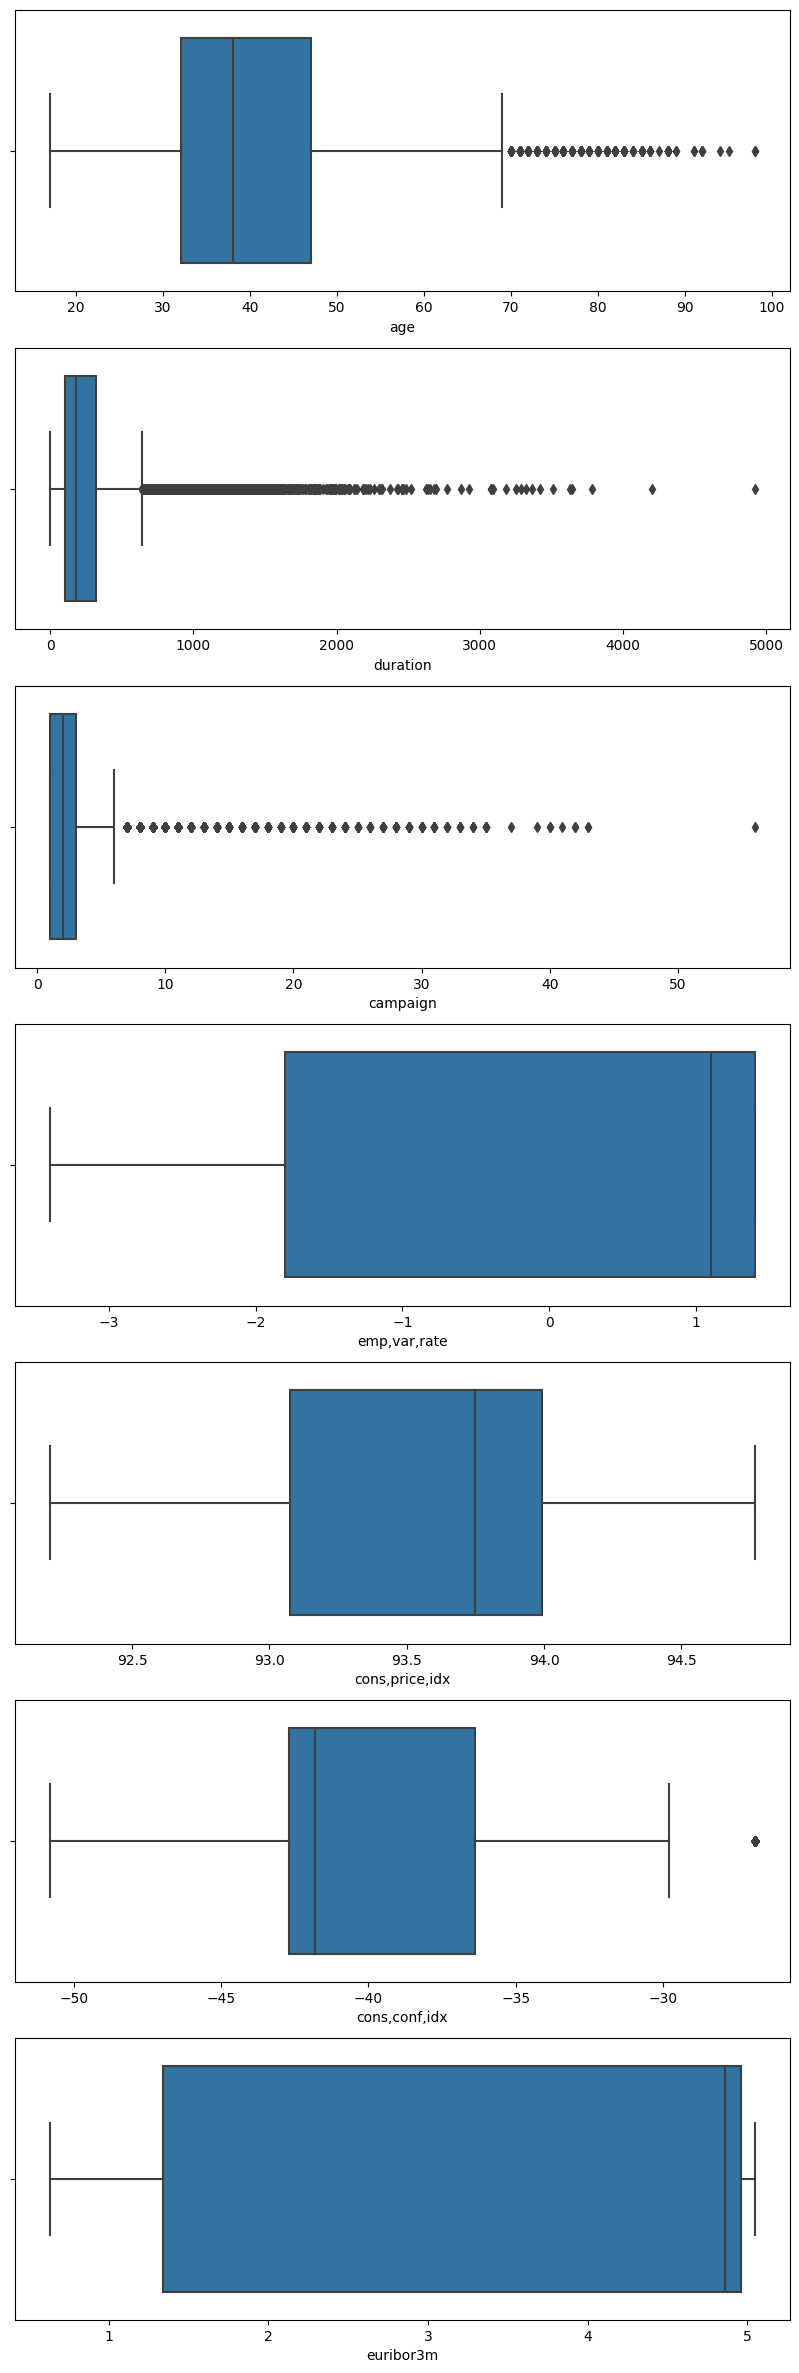

In [39]:
fig, axes = plt.subplots(len(df_num.columns), 1, figsize= (10, 30))

for i in range(len(df_num.columns)):
    sns.boxplot(x= df_num.columns[i], data= df_num, ax = axes[i]);


3. Identifica sobre el dataframe las filas que son outliers


In [40]:
def outliers(columnas, dataframe): 
    
    dict_indices = {} 

    for col in columnas:
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_dist = 1.5 * IQR

        outliers_df = dataframe[(dataframe[col] < Q1 - outlier_dist) | (dataframe[col] > Q3 + outlier_dist)]
                
        if outliers_df.shape[0] > 0:
        
            dict_indices[col] = (list(outliers_df.index))
            
    return dict_indices 

In [41]:
out_dict = outliers(list(df_num.columns), df)
out_dict

{'age': [27713,
  27757,
  27780,
  27800,
  27802,
  27808,
  27811,
  27813,
  27814,
  27815,
  27816,
  27817,
  27818,
  27826,
  27837,
  27844,
  27879,
  27902,
  27930,
  27950,
  27951,
  28220,
  28221,
  28312,
  28456,
  28504,
  28530,
  28540,
  28586,
  28619,
  28732,
  28773,
  29225,
  29263,
  29625,
  29668,
  29682,
  29973,
  29977,
  29981,
  29987,
  29990,
  30000,
  30004,
  30006,
  30078,
  30088,
  30103,
  30110,
  30133,
  30171,
  30214,
  30225,
  30227,
  30241,
  30335,
  30390,
  30430,
  30460,
  30589,
  35848,
  35856,
  35973,
  36183,
  36285,
  36311,
  36383,
  36384,
  36816,
  36998,
  37136,
  37170,
  37186,
  37190,
  37192,
  37195,
  37206,
  37207,
  37213,
  37219,
  37227,
  37235,
  37237,
  37239,
  37257,
  37260,
  37316,
  37341,
  37355,
  37371,
  37403,
  37454,
  37455,
  37472,
  37479,
  37493,
  37505,
  37509,
  37512,
  37525,
  37532,
  37545,
  37568,
  37570,
  37586,
  37601,
  37602,
  37604,
  37635,
  37661,
  3

4. Reemplaza los outliers por el estadístico más correcto.


In [43]:
for k, v in out_dict.items():
    mediana = df[k].median()
    for i in v: 
        df.loc[i,k] = mediana

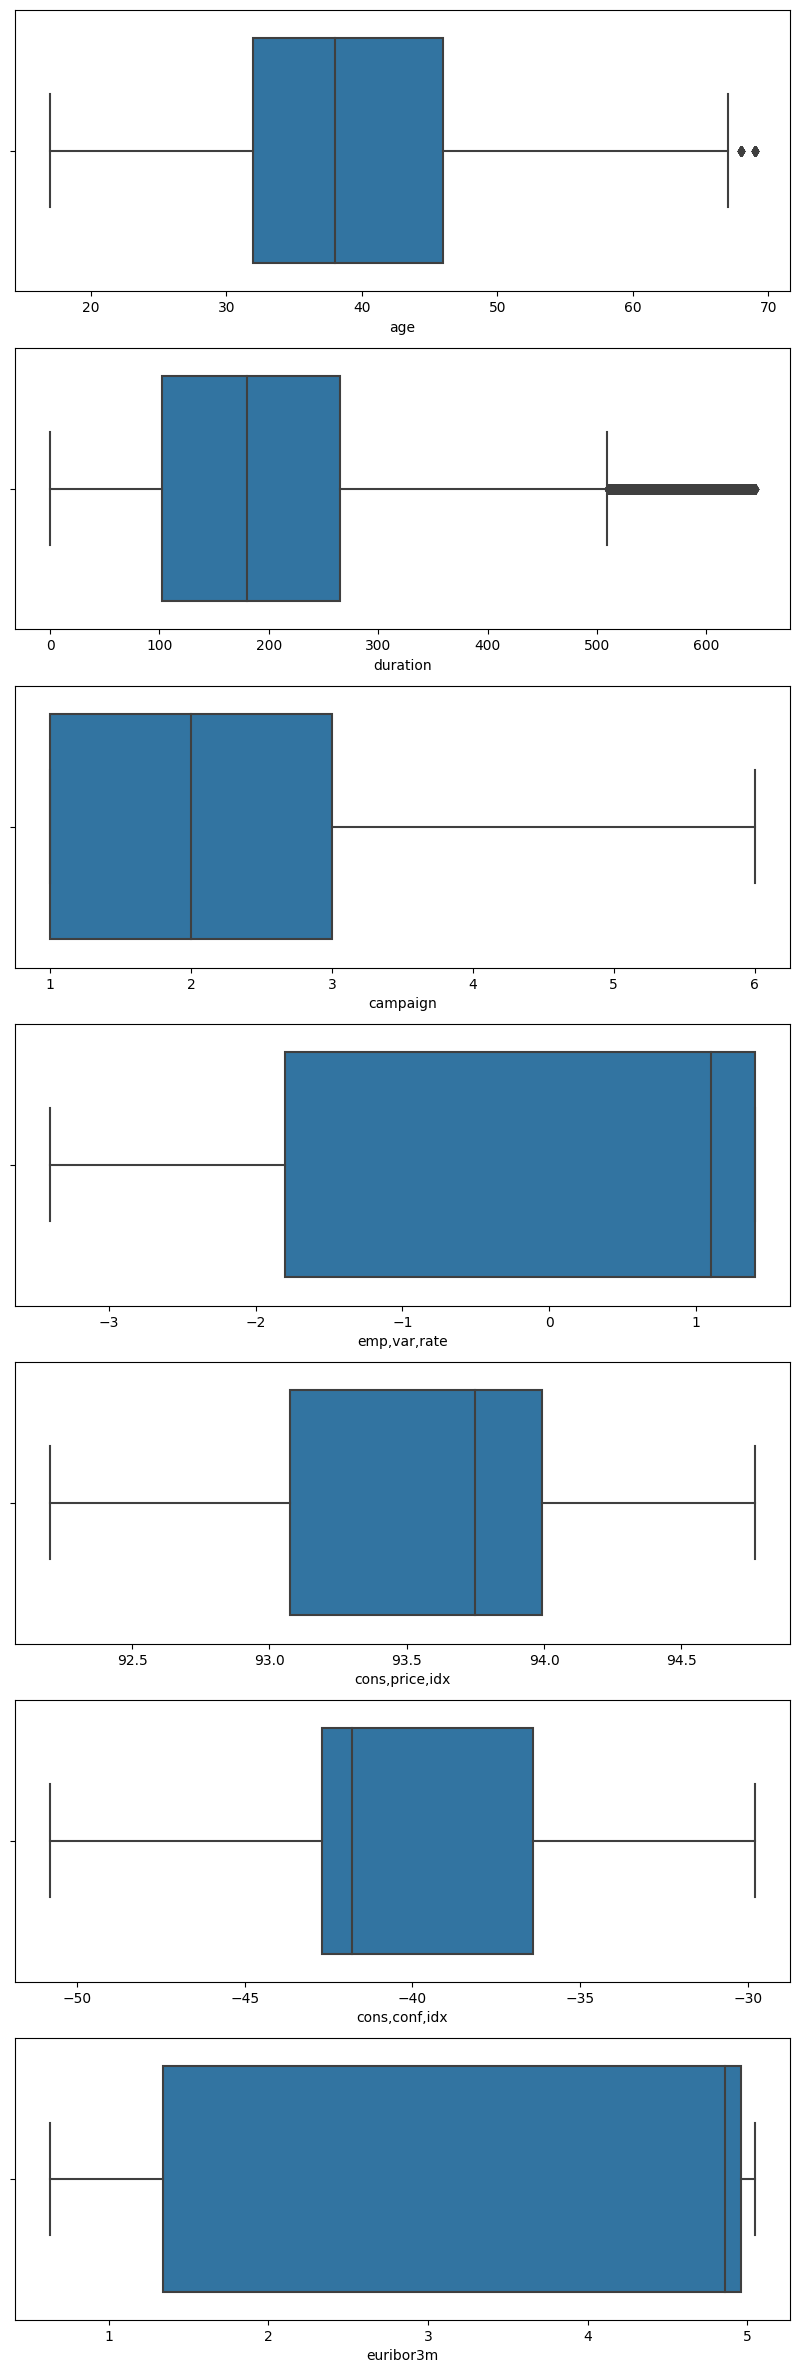

In [44]:
fig, axes = plt.subplots(len(df_num.columns), 1, figsize= (10, 30))

for i in range(len(df_num.columns)):
    sns.boxplot(x= df_num.columns[i], data= df, ax = axes[i]);

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [46]:
df.to_csv('data/bank_clean3.csv')